In [2]:
# libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import yfinance as yf
import tensorflow as tf

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import AgglomerativeClustering
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics

In [3]:
#                                           *** Preprocessing phase***
# Displaying the Bitcoin dataset
df = yf.download("BTC-USD")
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...
2021-08-23,49291.675781,50482.078125,49074.605469,49546.148438,49546.148438,34305053719
2021-08-24,49562.347656,49878.769531,47687.117188,47706.117188,47706.117188,35361168834
2021-08-25,47727.257812,49202.878906,47163.613281,48960.789062,48960.789062,32646349931


In [4]:
# let's check if we have any NAN in the dataset
df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

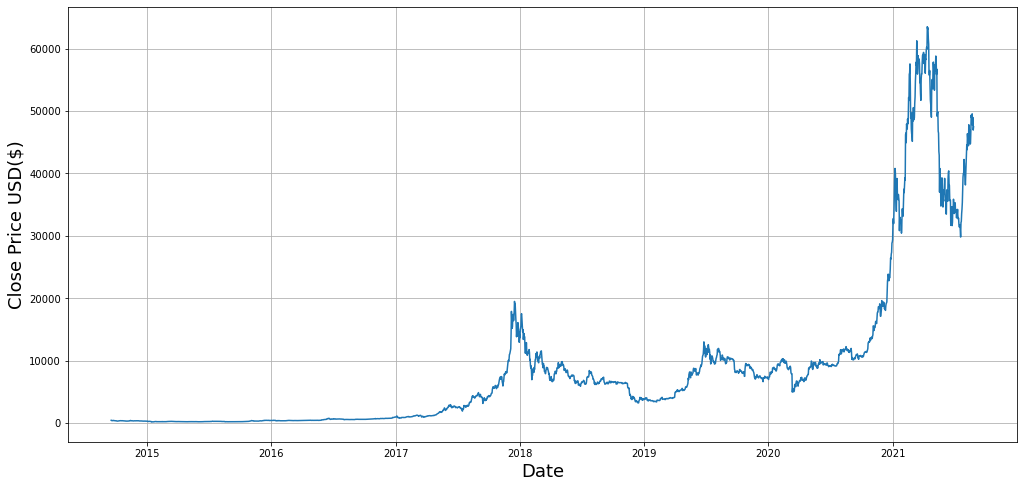

In [5]:
#                                  Let's have a quick vizualisation of our dataset 
# Close 
plt.figure(figsize=(17,8))
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD($)',fontsize=18)
plt.grid(True)

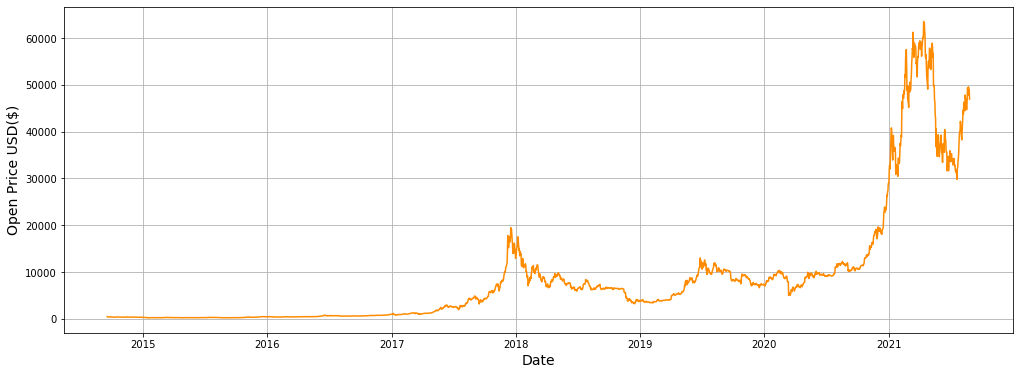

In [6]:
# Open 
plt.figure(figsize=(17,6))
plt.plot(df['Open'], color='darkorange')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Open Price USD($)',fontsize=14)
plt.grid(True)

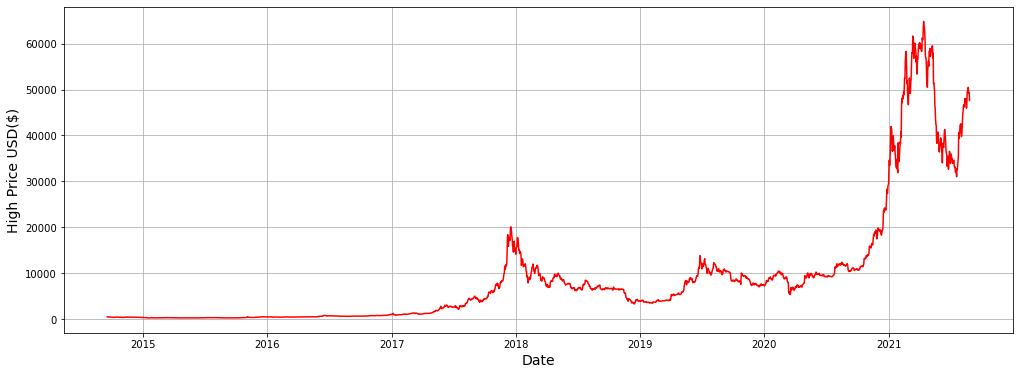

In [7]:
# High 
plt.figure(figsize=(17,6))
plt.plot(df['High'], color='red')
plt.xlabel('Date', fontsize=14)
plt.ylabel('High Price USD($)',fontsize=14)
plt.grid(True)

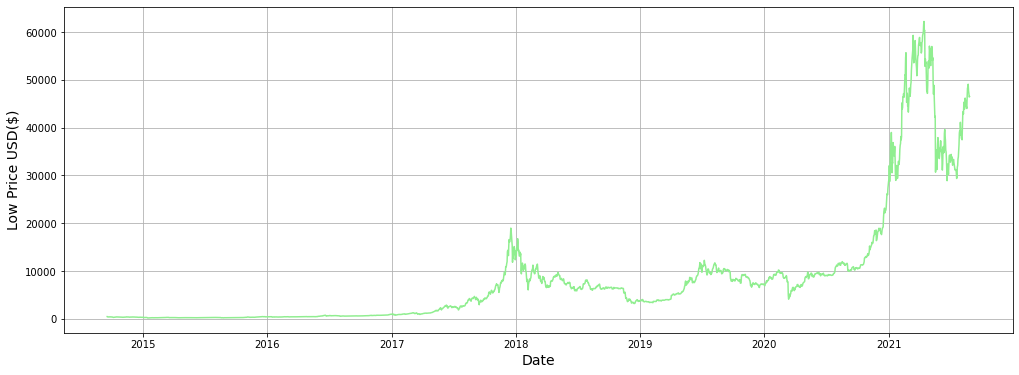

In [8]:
# Low 
plt.figure(figsize=(17,6))
plt.plot(df['Low'], color='lightgreen')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Low Price USD($)',fontsize=14)
plt.grid(True)

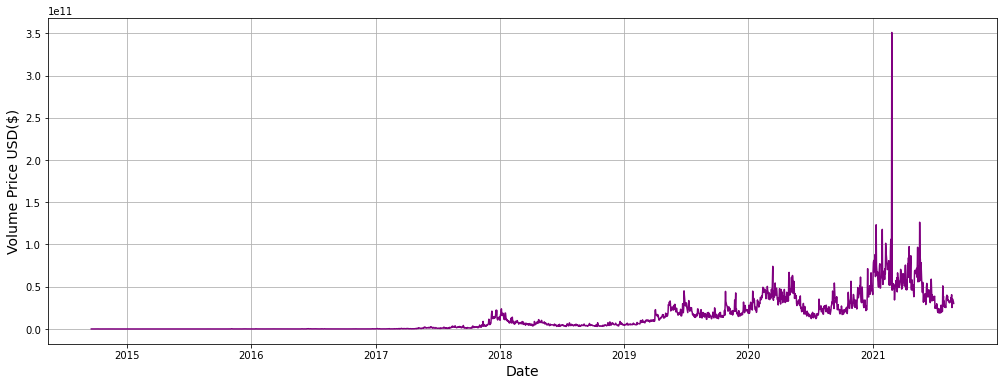

In [9]:
# Volume 
plt.figure(figsize=(17,6))
plt.plot(df['Volume'], color='purple')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Volume Price USD($)',fontsize=14)
plt.grid(True)

In [10]:
# reseting the index 
df.reset_index(inplace=True)

In [11]:
# getting rid of useless columns
df = df[['Date','Close']]

In [12]:
#                                        ***Machine learning phase***

# standardizing our data                          (standard diviation)
df['Close'] = (df['Close'] - df['Close'].mean()) / df['Close'].std()

<ipython-input-12-42cbccb4765d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Close'] = (df['Close'] - df['Close'].mean()) / df['Close'].std()


In [13]:
# now we have prices around the mean
df["Close"]

0      -0.641784
1      -0.644362
2      -0.646686
3      -0.645580
4      -0.646370
          ...   
2528    3.205814
2529    3.061591
2530    3.159933
2531    3.001717
2532    3.043226
Name: Close, Length: 2533, dtype: float64

In [14]:
#              So... I don't have the power to predict the prices of Bitcoin in the future, but i'm gonna   
#                     try to create a sequence of 15 days and predict the price on the 16th day

In [15]:
# splitting the data
x_train, x_val = train_test_split(df["Close"], test_size=0.2, shuffle=False)
x_val, x_test = train_test_split(x_val, test_size=0.4, shuffle=False)

In [16]:
# the model will be trained on the "x_train" and "x_val" datasets 
# then it will be tested on the "x_test" dataset

In [17]:
x_train

0      -0.641784
1      -0.644362
2      -0.646686
3      -0.645580
4      -0.646370
          ...   
2021   -0.173657
2022   -0.172967
2023   -0.159789
2024   -0.145143
2025   -0.149865
Name: Close, Length: 2026, dtype: float64

In [18]:
x_val

2026   -0.139351
2027   -0.145339
2028   -0.107665
2029   -0.115140
2030   -0.102781
          ...   
2325    1.951025
2326    2.105678
2327    2.259445
2328    2.216648
2329    2.312134
Name: Close, Length: 304, dtype: float64

In [19]:
x_test

2330    2.400053
2331    2.371635
2332    2.943264
2333    2.965575
2334    2.843072
          ...   
2528    3.205814
2529    3.061591
2530    3.159933
2531    3.001717
2532    3.043226
Name: Close, Length: 203, dtype: float64

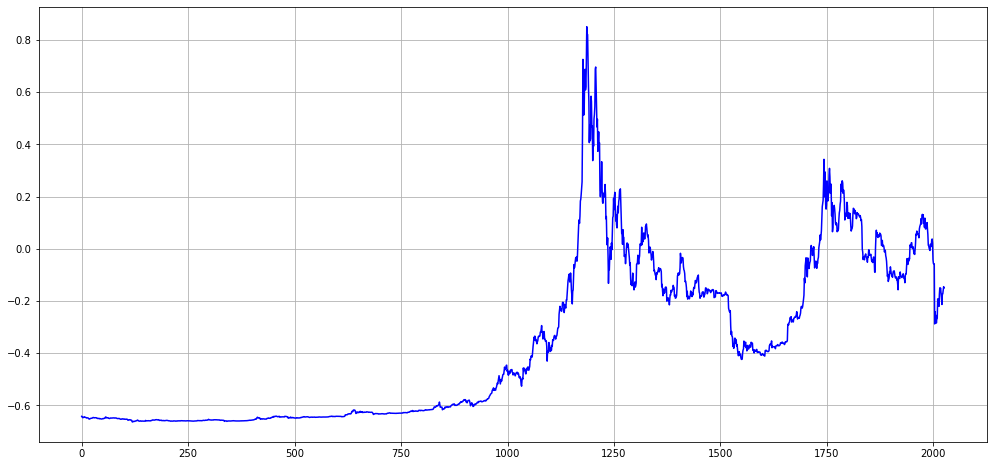

In [20]:
# x_train
plt.figure(figsize=(17,8))
plt.plot(x_train, color='b')
plt.grid(True)

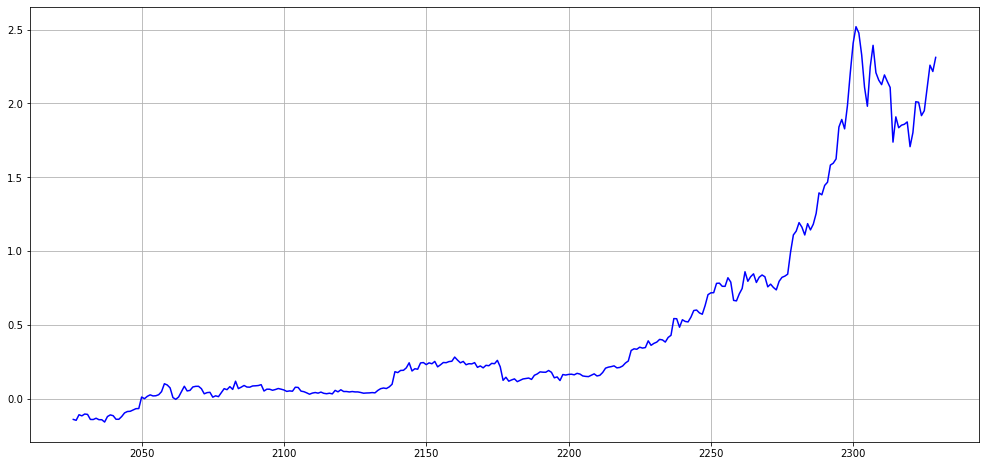

In [21]:
# x_val
plt.figure(figsize=(17,8))
plt.plot(x_val, color='b')
plt.grid(True)

In [22]:
# creating a tenserflow dataset to help us process the data in a better way

input_days = 16
output_days =32  #(32 sequences of 15 elements)

shuffle_buffer = x_train.shape[0] #(the number of rows)
def window_ds(series, input_days, output_days, shuffle_buffer):
    # transforming our series into dataset
    ds= tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(input_days + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(input_days  +1))
    ds = ds.shuffle(shuffle_buffer).map(lambda w: (w[:-1], w[-1]))
    ds= ds.batch(output_days).prefetch(1)
    return ds

In [23]:
x_train_ds = window_ds(x_train, input_days,output_days, shuffle_buffer)
x_val_ds = window_ds(x_train, input_days,output_days, x_val.shape[0])

In [24]:
x_train_ds

<PrefetchDataset shapes: ((None, None), (None,)), types: (tf.float64, tf.float64)>

In [25]:
x_val_ds

<PrefetchDataset shapes: ((None, None), (None,)), types: (tf.float64, tf.float64)>

In [26]:
# making the model
input_layer = tf.keras.layers.Input(shape=[input_days])
l0 = tf.keras.layers.Dense(128, activation="relu")(input_layer)
l1 = tf.keras.layers.Dense(256, activation="relu")(l0)
output_l = tf.keras.layers.Dense(1)(l1)

model = tf.keras.models.Model(inputs=input_layer, outputs=output_l)

In [27]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 16)]              0         
_________________________________________________________________
dense (Dense)                (None, 128)               2176      
_________________________________________________________________
dense_1 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 35,457
Trainable params: 35,457
Non-trainable params: 0
_________________________________________________________________


In [28]:
# compiling the model
model.compile(optimizer="RMSprop", 
             loss="mse",
             metrics="mse")

In [29]:
# training the model
model.fit(x_train_ds, validation_data=x_val_ds, epochs=100)

Epoch 1/100
63/63 [==============================] - 6s 50ms/step - loss: 0.0094 - mse: 0.0094 - val_loss: 0.0079 - val_mse: 0.0079
Epoch 2/100
63/63 [==============================] - 3s 35ms/step - loss: 0.0035 - mse: 0.0035 - val_loss: 0.0037 - val_mse: 0.0037
Epoch 3/100
63/63 [==============================] - 3s 38ms/step - loss: 0.0025 - mse: 0.0025 - val_loss: 6.6172e-04 - val_mse: 6.6172e-04
Epoch 4/100
63/63 [==============================] - 2s 20ms/step - loss: 0.0019 - mse: 0.0019 - val_loss: 0.0018 - val_mse: 0.0018
Epoch 5/100
63/63 [==============================] - 1s 11ms/step - loss: 0.0017 - mse: 0.0017 - val_loss: 0.0015 - val_mse: 0.0015
Epoch 6/100
63/63 [==============================] - 1s 11ms/step - loss: 0.0015 - mse: 0.0015 - val_loss: 9.8496e-04 - val_mse: 9.8496e-04
Epoch 7/100
63/63 [==============================] - 1s 12ms/step - loss: 0.0014 - mse: 0.0014 - val_loss: 5.9274e-04 - val_mse: 5.9274e-04
Epoch 8/100
63/63 [==============================] -

In [30]:
x_test = x_test.to_numpy()

In [31]:
# our predictions 
for i in range(0, len(x_test) - input_days , input_days):
    inp  = x_test[i:i + input_days][np.newaxis]
    pred = model.predict(inp)
    print(pred)

[[3.2482388]]
[[3.5245163]]
[[2.9870172]]
[[3.493786]]
[[2.8918166]]
[[3.0307949]]
[[2.096962]]
[[2.0094934]]
[[1.9505587]]
[[1.6440995]]
[[2.3963509]]
[[2.7356613]]


In [32]:
forecast = []
buys = {}
sells = {}

for i in range(0, len(x_test) - input_days , input_days):
    inp  = x_test[i:i + input_days][np.newaxis]
    pred = model.predict(inp)
    #f = model.predict(x_test[i:i+input_days][np.newaxis])[0][0]
    if pred > x_test[input_days+i]:
        buys.update({i+input_days:x_test[input_days+i]})
    else:
        sells.update({i+input_days:x_test[input_days+i]})

In [33]:
buys

{112: 2.035588955890748}

In [34]:
sells

{16: 3.571157960984238,
 32: 3.7123390049377405,
 48: 3.644051058329503,
 64: 4.0412553365696695,
 80: 3.6358841950385328,
 96: 3.219141781758628,
 128: 2.4747077295499462,
 144: 2.068882533199116,
 160: 1.7852008389044633,
 176: 2.4556156888273315,
 192: 2.825607295203457}

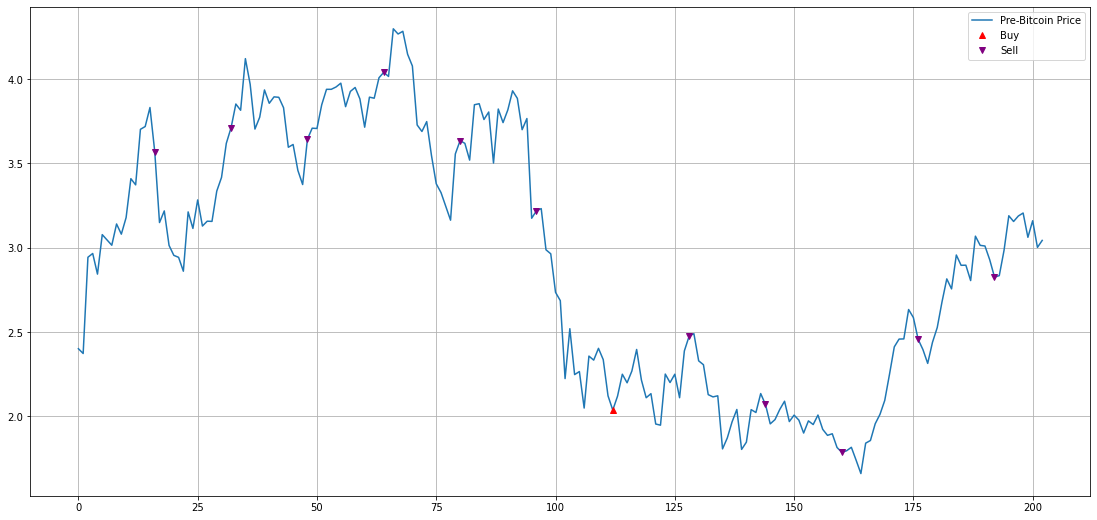

In [35]:
plt.figure(figsize=(19, 9))
plt.plot(x_test, label="Pre-Bitcoin Price")
plt.plot(forecast, label="")
# buys
plt.plot(list(buys.keys()), list(buys.values()), "^", color="r", label="Buy")
# sells
plt.plot(list(sells.keys()), list(sells.values()), "v", color="purple", label="Sell")
plt.legend()
plt.grid(True)

In [64]:
# ethereum
# 2014-09-17
dt = yf.download("ETH")
dt = dt.iloc[5404:,]
dt

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,25.500000,26.000000,25.309999,25.540001,18.627628,222842
2014-09-18,25.480000,25.799999,25.040001,25.180000,18.365061,211413
2014-09-19,25.190001,25.190001,24.450001,24.610001,17.949329,282752
2014-09-22,24.480000,24.510000,24.040001,24.170000,17.628414,94879
2014-09-23,24.040001,24.129999,23.750000,23.760000,17.329382,227434
...,...,...,...,...,...,...
2021-08-20,23.799999,24.250000,23.559999,24.080000,24.080000,289246
2021-08-23,24.280001,24.340000,23.787600,24.080000,24.080000,211162
2021-08-24,24.309999,24.790001,24.049999,24.600000,24.600000,230196


In [37]:
# checking for "NAN" in the dataset
dt.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

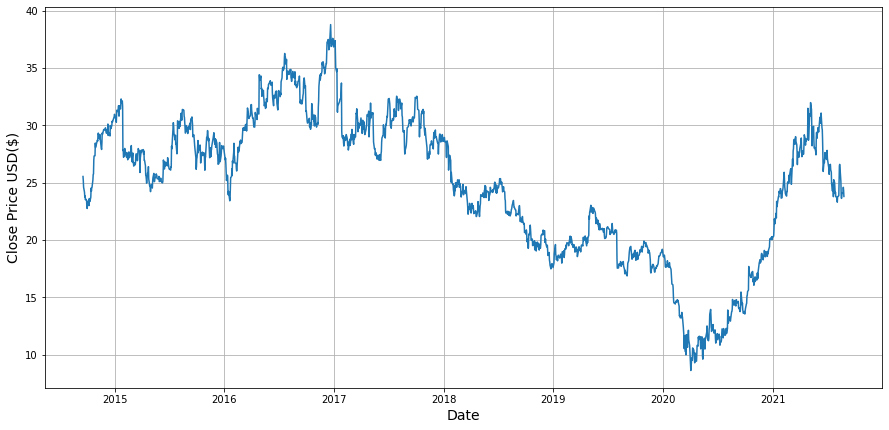

In [38]:
# Close 
plt.figure(figsize=(15,7))
plt.plot(dt['Close'])
plt.xlabel('Date', fontsize=14)
plt.ylabel('Close Price USD($)',fontsize=14)
plt.grid(True)

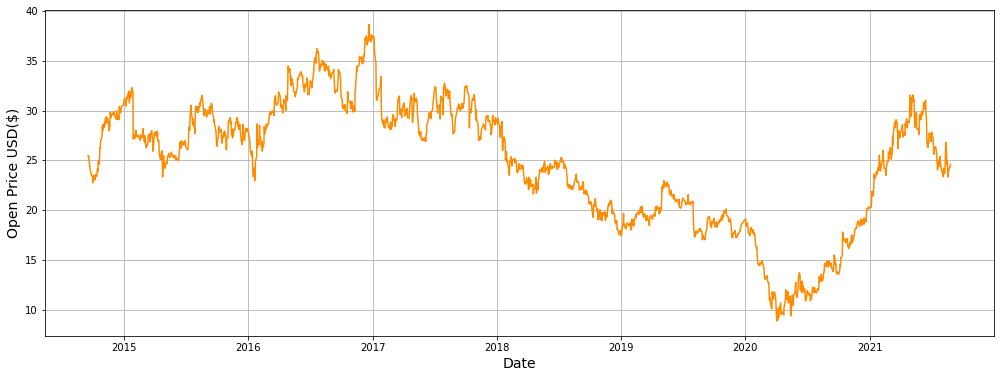

In [39]:
# Open 
plt.figure(figsize=(17,6))
plt.plot(dt['Open'], color='darkorange')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Open Price USD($)',fontsize=14)
plt.grid(True)

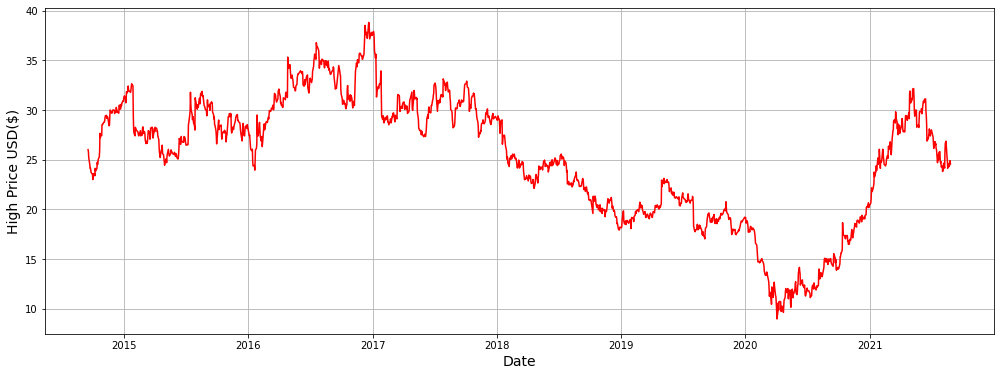

In [40]:
# High 
plt.figure(figsize=(17,6))
plt.plot(dt['High'], color='red')
plt.xlabel('Date', fontsize=14)
plt.ylabel('High Price USD($)',fontsize=14)
plt.grid(True)

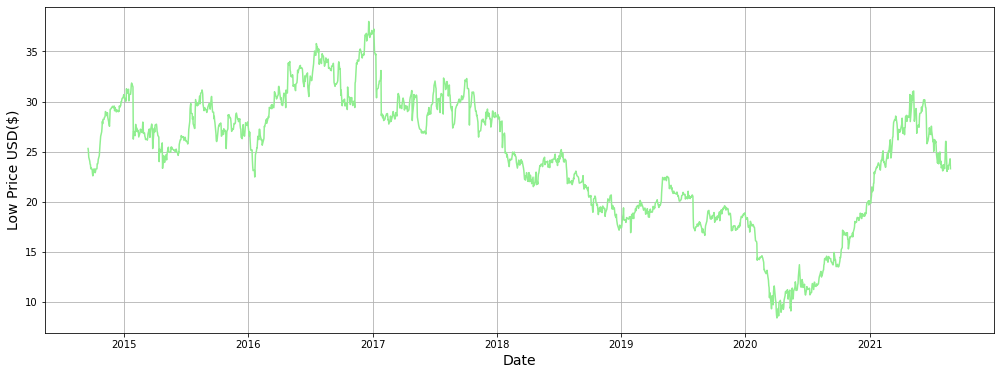

In [41]:
# Low 
plt.figure(figsize=(17,6))
plt.plot(dt['Low'], color='lightgreen')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Low Price USD($)',fontsize=14)
plt.grid(True)

In [42]:
# reseting the index 
dt.reset_index(inplace=True)

In [43]:
# getting rid of useless columns
dt = dt[['Date','Close']]

In [44]:
# standardizing our data                          (standard diviation)
dt['Close'] = (dt['Close'] - dt['Close'].mean()) / dt['Close'].std()

<ipython-input-44-93a411303163>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt['Close'] = (dt['Close'] - dt['Close'].mean()) / dt['Close'].std()


In [45]:
dt['Close']

0       0.135556
1       0.078432
2      -0.012015
3      -0.081833
4      -0.146891
          ...   
1744   -0.096114
1745   -0.096114
1746   -0.013601
1747   -0.054858
1748   -0.140544
Name: Close, Length: 1749, dtype: float64

In [46]:
x_train1, x_val1 = train_test_split(dt["Close"], test_size=0.2, shuffle=False)
x_val1, x_test1 = train_test_split(x_val1, test_size=0.4, shuffle=False)

In [47]:
shuffle_buffer = x_train.shape[0] #(the number of rows)
def window_ds(series, input_days, output_days, shuffle_buffer):
    # transforming our series into dataset
    ds= tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(input_days + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(input_days  +1))
    ds = ds.shuffle(shuffle_buffer).map(lambda w: (w[:-1], w[-1]))
    ds= ds.batch(output_days).prefetch(1)
    return ds

In [48]:
x_train_ds1 = window_ds(x_train1, input_days,output_days, shuffle_buffer)
x_val_ds1 = window_ds(x_train1, input_days,output_days, x_val1.shape[0])

In [49]:
x_train_ds1

<PrefetchDataset shapes: ((None, None), (None,)), types: (tf.float64, tf.float64)>

In [50]:
x_val_ds1

<PrefetchDataset shapes: ((None, None), (None,)), types: (tf.float64, tf.float64)>

In [51]:
# making the second model
input_layer1 = tf.keras.layers.Input(shape=[input_days])
l0 = tf.keras.layers.Dense(128, activation="relu")(input_layer1)
l1 = tf.keras.layers.Dense(256, activation="relu")(l0)
output_l1 = tf.keras.layers.Dense(1)(l1)

model1 = tf.keras.models.Model(inputs=input_layer1, outputs=output_l1)

In [52]:
model1.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 16)]              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               2176      
_________________________________________________________________
dense_4 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 257       
Total params: 35,457
Trainable params: 35,457
Non-trainable params: 0
_________________________________________________________________


In [53]:
# compiling the model
model1.compile(optimizer="RMSprop", 
             loss="mse",
             metrics="mse")

In [54]:
# training the model
model1.fit(x_train_ds1, validation_data=x_val_ds1, epochs=100)

Epoch 1/100
44/44 [==============================] - 2s 16ms/step - loss: 0.0447 - mse: 0.0447 - val_loss: 0.0337 - val_mse: 0.0337
Epoch 2/100
44/44 [==============================] - 1s 15ms/step - loss: 0.0223 - mse: 0.0223 - val_loss: 0.0389 - val_mse: 0.0389
Epoch 3/100
44/44 [==============================] - 1s 19ms/step - loss: 0.0205 - mse: 0.0205 - val_loss: 0.0202 - val_mse: 0.0202
Epoch 4/100
44/44 [==============================] - 1s 12ms/step - loss: 0.0147 - mse: 0.0147 - val_loss: 0.0191 - val_mse: 0.0191
Epoch 5/100
44/44 [==============================] - 1s 16ms/step - loss: 0.0143 - mse: 0.0143 - val_loss: 0.0196 - val_mse: 0.0196
Epoch 6/100
44/44 [==============================] - 1s 15ms/step - loss: 0.0159 - mse: 0.0159 - val_loss: 0.0322 - val_mse: 0.0322
Epoch 7/100
44/44 [==============================] - 1s 19ms/step - loss: 0.0137 - mse: 0.0137 - val_loss: 0.0079 - val_mse: 0.0079
Epoch 8/100
44/44 [==============================] - 1s 19ms/step - loss: 0.

In [55]:
x_test1 = x_test1.to_numpy()

In [56]:
# our predictions 
for i in range(0, len(x_test1) - input_days , input_days):
    inp1  = x_test1[i:i + input_days][np.newaxis]
    pred1 = model.predict(inp1)
    print(pred1)

[[0.27766344]]
[[0.41731745]]
[[0.65379506]]
[[1.0248969]]
[[0.726586]]
[[0.41400993]]
[[-0.02523212]]
[[0.07196163]]


In [57]:
forecast1 = []
buys1 = {}
sells1 = {}

for i in range(0, len(x_test1) - input_days , input_days):
    inp1  = x_test1[i:i + input_days][np.newaxis]
    pred1 = model1.predict(inp1)
    #f = model.predict(x_test[i:i+input_days][np.newaxis])[0][0]
    if pred1 > x_test1[input_days+i]:
        buys1.update({i+input_days:x_test1[input_days+i]})
    else:
        sells1.update({i+input_days:x_test1[input_days+i]})

In [58]:
buys1

{16: 0.20220064919563638,
 48: 0.6607807524680924,
 64: 0.8020042226587416,
 80: 0.7528140761858044,
 96: 0.4291104738758355}

In [59]:
sells1

{32: 0.4291104738758355, 112: 0.019720819730898117, 128: 0.2847133677438145}

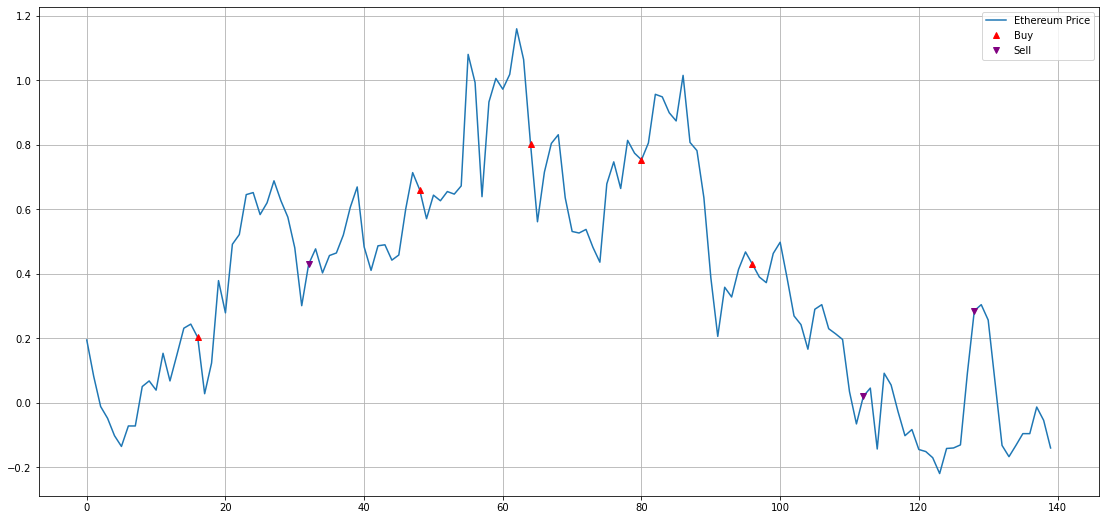

In [60]:
plt.figure(figsize=(19, 9))
plt.plot(x_test1, label="Ethereum Price")


# buys
plt.plot(list(buys1.keys()), list(buys1.values()), "^", color="r", label="Buy")
# sells
plt.plot(list(sells1.keys()), list(sells1.values()), "v", color="purple", label="Sell")
plt.legend()
plt.grid(True)

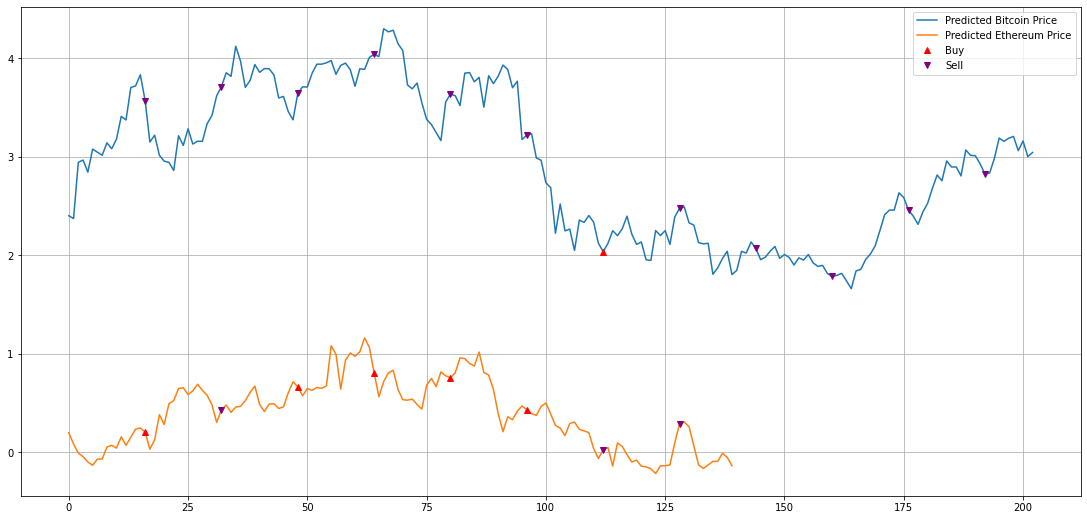

In [70]:
plt.figure(figsize=(19, 9))
plt.plot(x_test, label="Predicted Bitcoin Price")
plt.plot(x_test1, label="Predicted Ethereum Price")

# buys
plt.plot(list(buys.keys()), list(buys.values()), "^", color="r", label="Buy")
plt.plot(list(buys1.keys()), list(buys1.values()), "^", color="r")
# sells
plt.plot(list(sells.keys()), list(sells.values()), "v", color="purple", label="Sell")
plt.plot(list(sells1.keys()), list(sells1.values()), "v", color="purple")
plt.legend()
plt.grid(True)

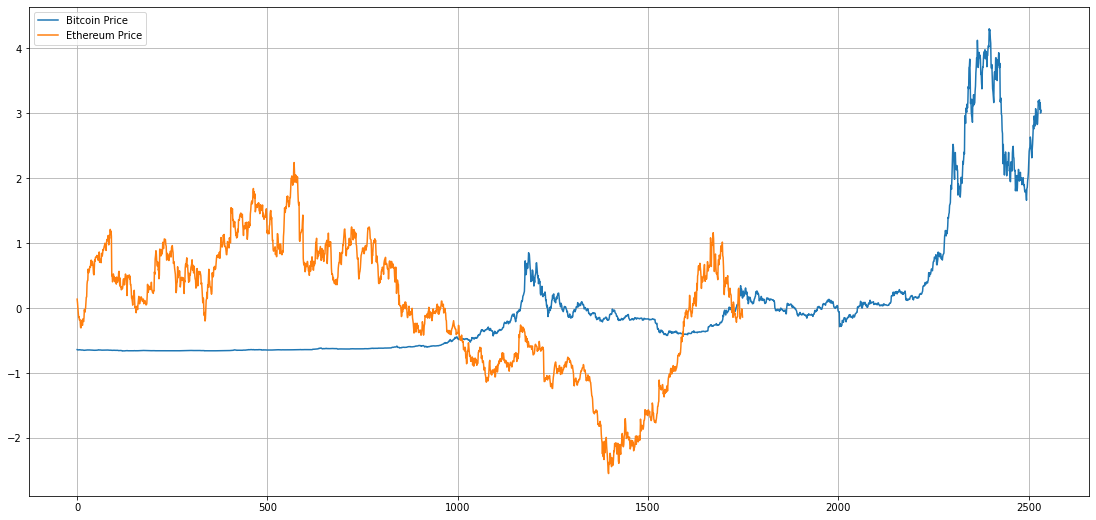

In [62]:
plt.figure(figsize=(19, 9))
plt.plot(df['Close'], label="Bitcoin Price")
plt.plot(dt['Close'] , label="Ethereum Price",color='green')
plt.legend()
plt.grid(True)